In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
a1 = torch.tensor(1.5)
a2 = torch.tensor(2.5)
a3 = torch.tensor(3.5)
a4 = torch.tensor(4.5)
c = torch.add(a1, a2)
c1 =torch.add(a3, a4)
print(c,c1)

tensor(4.) tensor(8.)


In [4]:
model = nn.Sequential(
    nn.Linear(8,12),
    nn.ReLU(),
    nn.Linear(12,8),
    nn.ReLU(),
    nn.Linear(8,12),
    nn.ReLU(),
    nn.Linear(12,1),
    nn.Sigmoid()
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=12, bias=True)
  (5): ReLU()
  (6): Linear(in_features=12, out_features=1, bias=True)
  (7): Sigmoid()
)


In [5]:

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database", "diabetes.csv")
print("Path to dataset files:", path)

data_set = np.loadtxt(path, delimiter=',', skiprows=1)
print(data_set)


Path to dataset files: /kaggle/input/pima-indians-diabetes-database/diabetes.csv
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [6]:
X = data_set[:,0:8]
y = data_set[:,8]
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)

loss_fn = nn.BCELoss()

In [7]:
Optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
batch_size = 10
loss_history = []

for epoch in range(epochs + 1):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i + batch_size]
        y_pred = model(X_batch)

        y_batch = y[i:i + batch_size]
        loss = loss_fn(y_pred, y_batch)

        Optimizer.zero_grad()
        loss.backward()
        Optimizer.step()
    loss_history.append(loss)
    print(f'epoch: {epoch}, loss: {loss.item()}')

epoch: 0, loss: 0.5857728719711304
epoch: 1, loss: 0.5313069224357605
epoch: 2, loss: 0.5284207463264465
epoch: 3, loss: 0.5520662069320679
epoch: 4, loss: 0.5017644166946411
epoch: 5, loss: 0.5223063230514526
epoch: 6, loss: 0.5360729694366455
epoch: 7, loss: 0.5201258659362793
epoch: 8, loss: 0.49530383944511414
epoch: 9, loss: 0.5218676924705505
epoch: 10, loss: 0.5348324179649353
epoch: 11, loss: 0.49317434430122375
epoch: 12, loss: 0.5348009467124939
epoch: 13, loss: 0.5273207426071167
epoch: 14, loss: 0.5312039256095886
epoch: 15, loss: 0.5277061462402344
epoch: 16, loss: 0.4894765019416809
epoch: 17, loss: 0.519383430480957
epoch: 18, loss: 0.5169103145599365
epoch: 19, loss: 0.5338936448097229
epoch: 20, loss: 0.48108139634132385
epoch: 21, loss: 0.5323266386985779
epoch: 22, loss: 0.5067894458770752
epoch: 23, loss: 0.5186951756477356
epoch: 24, loss: 0.5185859203338623
epoch: 25, loss: 0.48216909170150757
epoch: 26, loss: 0.503049910068512
epoch: 27, loss: 0.4966317117214203


In [8]:
# method 01

i = 5
X_sample = X[i:i+1]
y_pred = model(X_sample)

print(f'{X_sample} --> {y_pred}')

tensor([[  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
          30.0000]]) --> tensor([[0.3623]], grad_fn=<SigmoidBackward0>)


In [9]:
# method 02

i = 5
X_sample = X[i:i+1]
model.eval()
with torch.no_grad():
    y_pred = model(X_sample)

print(f'{X_sample} --> {y_pred}')


tensor([[  5.0000, 116.0000,  74.0000,   0.0000,   0.0000,  25.6000,   0.2010,
          30.0000]]) --> tensor([[0.3623]])


Text(0.5, 0, 'Epochs')

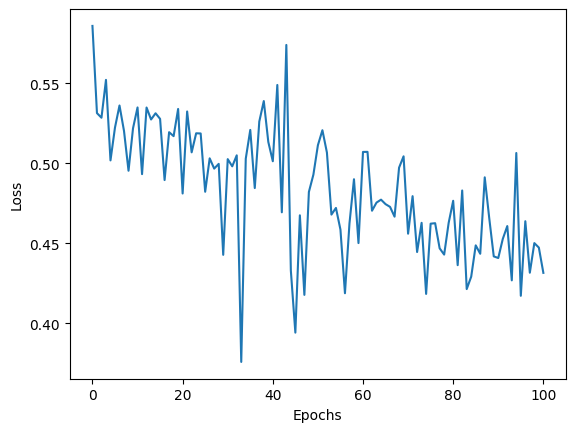

In [10]:
plt.plot(range(epochs+1), [loss.item() for loss in loss_history]) #changed
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [11]:
model.eval()
with torch.no_grad():
    y_pred = model(X)

accuracy = (y_pred.round() == y).float().mean()
print(f'Accuracy: {accuracy}')

Accuracy: 0.7057291865348816
